In [1]:
%reload_ext autoreload

%autoreload 2

In [2]:
input_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv"
directlfq_file = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv.diann_precursor_ms1_and_ms2.protein_intensities.tsv"

diann_protein_intensities = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report.tsv.diann_protein.aq_reformat.tsv"
iq_protein_intensities = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/report_iq_results.tsv"

samplemap  = "../../test_data/system_tests/Spectronaut_LargeFC/re_run_DIANN/samplemap.tsv"

run_directlfq = True
run_protein_reformating = False

In [3]:
if run_protein_reformating:
    import directlfq.utils as lfq_utils
    lfq_utils.import_data(input_file=input_file, input_type_to_use="diann_protein")

In [4]:
if run_directlfq:
    import directlfq.lfq_manager as lfqmgr

    lfqmgr.run_lfq(input_file=input_file, input_type_to_use="diann_precursor_ms1_and_ms2", min_nonan=1)


Starting directLFQ analysis.
reformatting input file, for large files this might take a while.
using input type diann_fragion_isotopes_topn
Performing sample normalization.
Estimating lfq intensities.
13392 prots total
using 10 processes
prot 0
prot 400
prot 700
prot 100
prot 1700
prot 1400
prot 200
prot 2700prot 2400

prot 1100
prot 800
prot 500
prot 2100
prot 300
prot 1800
prot 3100
prot 1500
prot 2800
prot 2500
prot 1200
prot 3400
prot 2200
prot 900
prot 600
prot 3200
prot 1600
prot 1900
prot 2900
prot 2600
prot 3500
prot 1300
prot 2300prot 3700

prot 1000
prot 3300
prot 2000
prot 3000
prot 3600

prot 3800prot 4700
prot 4100

prot 5400
prot 4400
prot 5700prot 3900
prot 5100
prot 4800
prot 6700
prot 4200
prot 6400
prot 6100
prot 4500
prot 4000
prot 5200
prot 5500
prot 5800
prot 6500
prot 4300
prot 6800
prot 6200
prot 4900
prot 5300
prot 6900
prot 6600
prot 4600prot 5600

prot 7100prot 7400

prot 5900
prot 6300
prot 7000
prot 5000
prot 8400
prot 6000
prot 7800
prot 8100
prot 7200
prot

In [5]:
import directlfq.benchmarking as lfqbenchmark
import directlfq.utils as lfqutils


samples_used = lfqutils.get_samples_used_from_samplemap_file(samplemap, cond1="S1", cond2="S2")





restable_directlfq = lfqbenchmark.ResultsTableDirectLFQ(input_file=directlfq_file, input_name="directLFQ", samples_c1=samples_used[0], samples_c2=samples_used[1])
restable_iq = lfqbenchmark.ResultsTableIq(input_file=iq_protein_intensities, input_name="iq", samples_c1=samples_used[0], samples_c2=samples_used[1])

restable_diann = lfqbenchmark.ResultsTableDirectLFQ(input_file=diann_protein_intensities, input_name="DIANN", samples_c1=samples_used[0], samples_c2=samples_used[1])

/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: invalid value encountered in double_scalars
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:153: RuntimeWarning: divide by zero encountered in log2
  self.formated_dataframe[self.log2fc_column] = [np.log2(x[0]) - np.log2(x[1]) for x in zip(self.formated_dataframe['median_intensity_c1'], self.formated_dataframe['median_intensity_c2'])]
/Users/constantin/workspace/directlfq/directlfq/benchmarking.py:

In [6]:
display(restable_iq.formated_dataframe)
display(restable_directlfq.formated_dataframe)
display(restable_diann.formated_dataframe)

,protein,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,P0CG40,399044.298225,393193.930192,466436.312727,400725.674709,383717.523799,4.458798e+05,399044.298225,400725.674709,-0.006066,399884.986467
1,Q86U42,146637.625915,136744.373352,144356.534457,158803.677339,154639.552058,1.459582e+05,144356.534457,154639.552058,-0.099273,149498.043258
2,P37108,217117.633612,234467.526584,239608.072922,230674.433682,242917.404786,2.247949e+05,234467.526584,230674.433682,0.023530,232570.980133
3,Q96JP5,75074.616190,51527.666864,68152.006248,67234.467807,76040.729613,7.201105e+04,68152.006248,72011.049986,-0.079462,70081.528117
4,P36578,418459.134032,445605.494870,462189.900964,435077.385066,436150.418888,4.465315e+05,445605.494870,436150.418888,0.030941,440877.956879
...,...,...,...,...,...,...,...,...,...,...,...
11666,O17005,NaN,NaN,6556.525382,39657.352969,31660.372975,1.325625e+04,6556.525382,31660.372975,-2.271675,19108.449178
11667,O61219,36436.457488,35186.024233,43536.353419,43004.096250,39746.363443,3.989696e+04,36436.457488,39896.960382,-0.130896,38166.708935
11668,Q20770,13865.651053,18660.166826,20649.624385,24906.552665,22825.598393,2.224607e+04,18660.166826,22825.598393,-0.290691,20742.882610
11669,P53013;Q05639,708745.531591,653026.722419,748161.012257,881704.002954,829021.599468,1.025526e+06,708745.531591,881704.002954,-0.315027,795224.767272


,protein,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,Protein.Group,Protein.Names,Genes,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A023PYF4,1.873541e+06,1.814791e+06,2.162360e+06,1.914144e+06,1.858060e+06,2.211496e+06,A0A023PYF4,YE145_YEAST,YER145C-A,1.873541e+06,1.914144e+06,-0.030932,1.893843e+06
1,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,7.722983e+05,1.336750e+06,1.057135e+06,1.156381e+06,1.195993e+06,1.134188e+06,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,A0A061ACH4_CAEEL;A0A061ACK7_CAEEL;A0A061ADS3_C...,CELE_Y62E10A.13,1.057135e+06,1.156381e+06,-0.129457,1.106758e+06
2,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,1.640164e+06,2.001225e+06,2.017627e+06,1.637464e+06,1.825839e+06,1.618453e+06,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,A0A061ACK1_CAEEL;A0A061AIW8_CAEEL;A0A061AKM4_C...,CELE_F59B8.1,2.001225e+06,1.637464e+06,0.289420,1.819345e+06
3,A0A061ACL3;O76618;Q965I6,3.474994e+07,3.368172e+07,2.905244e+07,4.184671e+07,4.249945e+07,4.258142e+07,A0A061ACL3;O76618;Q965I6,A0A061ACL3_CAEEL;O76618_CAEEL;Q965I6_CAEEL,cars-1,3.368172e+07,4.249945e+07,-0.335478,3.809058e+07
4,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,6.051411e+07,6.239669e+07,5.752070e+07,8.567424e+07,8.861491e+07,7.566751e+07,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,A0A061ACM2_CAEEL;A0A061ACP8_CAEEL;A0A061ADW6_C...,eps-8,6.051411e+07,8.567424e+07,-0.501590,7.309417e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13386,V6CLG8,4.105225e+06,5.310651e+06,3.140429e+06,6.498195e+06,8.024580e+06,6.348093e+06,V6CLG8,V6CLG8_CAEEL,hsp-60,4.105225e+06,6.498195e+06,-0.662578,5.301710e+06
13387,V6CLP5,1.693246e+08,1.694929e+08,1.779431e+08,2.226713e+08,2.092646e+08,2.247474e+08,V6CLP5,KETN1_CAEEL,ketn-1,1.694929e+08,2.226713e+08,-0.393691,1.960821e+08
13388,V6CLQ8;V6CLV0,1.280378e+07,1.544513e+07,1.603955e+07,1.881307e+07,2.077938e+07,2.047085e+07,V6CLQ8;V6CLV0,V6CLQ8_CAEEL;V6CLV0_CAEEL,pqn-22,1.544513e+07,2.047085e+07,-0.406419,1.795799e+07
13389,W6RRP9;W6RT83,4.400520e+06,3.944963e+06,4.668912e+06,4.257203e+06,4.723764e+06,4.697679e+06,W6RRP9;W6RT83,W6RRP9_CAEEL;W6RT83_CAEEL,CELE_Y73E7A.3,4.400520e+06,4.697679e+06,-0.094274,4.549100e+06


,protein,ion,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S1-120kMS1_MHRM_R03,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R01,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R02,MP-LFC-MS1var-OT-S2-120kMS1_MHRM_R03,median_intensity_c1,median_intensity_c2,log2fc,mean_intensity
0,A0A023PYF4,YE145_YEAST,544268.0,417729.0,464828.0,412056.0,435935.0,470289.0,464828.0,435935.0,0.092584,450381.5
1,A0A061ACH4;A0A061ACK7;A0A061ADS3;A0A061AKN1;Q9...,A0A061ACH4_CAEEL;A0A061ACK7_CAEEL;A0A061ADS3_C...,158414.0,229506.0,228050.0,267741.0,265953.0,268719.0,228050.0,267741.0,-0.231488,247895.5
2,A0A061ACK1;A0A061AIW8;A0A061AKM4;Q86D10,A0A061ACK1_CAEEL;A0A061AIW8_CAEEL;A0A061AKM4_C...,748050.0,686265.0,858649.0,517367.0,594011.0,439250.0,748050.0,517367.0,0.531947,632708.5
3,A0A061ACL3;O76618;Q965I6,A0A061ACL3_CAEEL;O76618_CAEEL;Q965I6_CAEEL,1373000.0,1288840.0,1294210.0,1647560.0,1625130.0,1718860.0,1294210.0,1647560.0,-0.348259,1470885.0
4,A0A061ACM2;A0A061ACP8;A0A061ADW6;A0A4V0IJW4;A0...,A0A061ACM2_CAEEL;A0A061ACP8_CAEEL;A0A061ADW6_C...,2603830.0,2786170.0,2504260.0,3229710.0,3330260.0,3095400.0,2603830.0,3229710.0,-0.310769,2916770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13561,V6CLG8,V6CLG8_CAEEL,1063340.0,1221340.0,1035000.0,1162960.0,1371210.0,1259920.0,1063340.0,1259920.0,-0.244729,1161630.0
13562,V6CLP5,KETN1_CAEEL,5311470.0,5417460.0,5364780.0,6488850.0,6493780.0,6460810.0,5364780.0,6488850.0,-0.274444,5926815.0
13563,V6CLQ8;V6CLV0,V6CLQ8_CAEEL;V6CLV0_CAEEL,1938260.0,1842410.0,2134610.0,2301040.0,2291520.0,2286380.0,1938260.0,2291520.0,-0.241543,2114890.0
13564,W6RRP9;W6RT83,W6RRP9_CAEEL;W6RT83_CAEEL,749273.0,640319.0,745455.0,617026.0,665880.0,788403.0,745455.0,665880.0,0.162859,705667.5


In [7]:
organism_annotator_diann_based = lfqbenchmark.OrganismAnnotatorDIANN(mapping_file=input_file)
organism_annotator_diann_based.annotate_table_with_organism(restable_directlfq)
organism_annotator_diann_based.annotate_table_with_organism(restable_diann)
organism_annotator_diann_based.annotate_table_with_organism(restable_iq)


In [8]:
import seaborn as sns
import directlfq.visualizations as lfq_viz

class MultiOrganismMultiMethodBoxPlotAdapted(lfq_viz.MultiOrganismMultiMethodBoxPlot):
    def plot_boxplot(self):
        color_palette = sns.color_palette(self._colorlist_hex, n_colors=len(self._fcs_to_expect))
        sns.violinplot(data=self._method_ratio_results_table, x="method", y = "log2fc", hue= "organism", palette=color_palette, hue_order=self._organisms_to_plot, ax=self.ax, linewidth=0.8)


In [9]:
class MultiOrganismIntensityFCPlotter():
    def __init__(self, ax, resultstable_w_ratios, organisms_to_plot = None, fcs_to_expect = None, title = ""):
        print('init MultiOrganismIntensityFCPlotter')
        self.ax = ax
        self._color_list_hex = ['#ffd479', '#325e7a', '#bad566']
        self._resultstable_w_ratios = resultstable_w_ratios
        self._organism_column = resultstable_w_ratios.organism_column
        self._log2fc_column = resultstable_w_ratios.log2fc_column
        self._mean_intensity_column = resultstable_w_ratios.mean_intensity_column
        
        self._organisms_to_plot = self._get_organisms_to_plot(organisms_to_plot)
        self._fcs_to_expect = fcs_to_expect

        self._title = self._get_title(title)
        self._scatter_per_organism()
        self._add_expected_lines()

    def _get_organisms_to_plot(self, organisms_to_plot):
        if organisms_to_plot is not None:
            return organisms_to_plot
        else:
            return sorted(list(set(self._resultstable_w_ratios.formated_dataframe[self._organism_column].astype('str'))))
    
    def _get_title(self, title):
        if title !="":
            self._print_infos_about_data()
            return title
        return self._generate_title()

    def _print_infos_about_data(self):
        for organism in self._organisms_to_plot:
            subtable_organism = self._get_organism_subtable(organism)
            print(self._get_stats_of_organism(organism, subtable_organism))

    def _generate_title(self):
        for organism in self._organisms_to_plot:
            subtable_organism = self._get_organism_subtable(organism)
            title += self._get_stats_of_organism(organism, subtable_organism)
        return title

    def _scatter_per_organism(self):
        complete_table = self._resultstable_w_ratios.formated_dataframe.copy()
        complete_table[self._mean_intensity_column] = np.log2(complete_table[self._mean_intensity_column])
        complete_table = self._remove_omitted_organisms_from_table(complete_table)
        color_palette = sns.color_palette(self._color_list_hex, n_colors=len(self._organisms_to_plot))
        sns.scatterplot(data= complete_table, x =self._mean_intensity_column, y= self._log2fc_column, hue=self._organism_column, alpha=0.15, ax=self.ax, 
        hue_order=self._organisms_to_plot, palette=color_palette, size=0.2)
        self.ax.set_title(self._title)
    
    def _remove_omitted_organisms_from_table(self, complete_table):
        row_w_permitted_organism = [x in self._organisms_to_plot for x in complete_table["organism"]]
        return complete_table[row_w_permitted_organism]

    def _add_expected_lines(self):
        if self._fcs_to_expect is not None:
            for idx, fc in enumerate(self._fcs_to_expect):
                color = self._color_list_hex[idx]
                self.ax.axhline(fc, color = color)

    def _get_organism_subtable(self, organism):
        complete_table = self._resultstable_w_ratios.formated_dataframe
        return complete_table[complete_table[self._organism_column] == organism]
    
    def _get_stats_of_organism(self, organism, subtable_organism):
        fcs = subtable_organism[self._log2fc_column].to_numpy()
        fcs = fcs[np.isfinite(fcs)]
        median_fc = np.nanmedian(fcs)
        std_fc = np.nanstd(fcs)
        num_ratios = sum(~np.isnan(fcs))
        return f"{organism} num:{num_ratios} median_FC:{median_fc:.2} STD:{std_fc:.2}\n"

YEAST num:2322 median_FC:1.0 STD:0.47

HUMAN num:6355 median_FC:0.029 STD:0.27

CAEEL num:3688 median_FC:-0.34 STD:0.36

YEAST num:2206 median_FC:0.98 STD:0.42

HUMAN num:5790 median_FC:-0.018 STD:0.22

CAEEL num:3300 median_FC:-0.38 STD:0.29

YEAST num:2323 median_FC:1.1 STD:0.51

HUMAN num:6357 median_FC:0.07 STD:0.31

CAEEL num:3690 median_FC:-0.29 STD:0.39



/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/constantin/opt/anaconda3/envs/directlfq/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


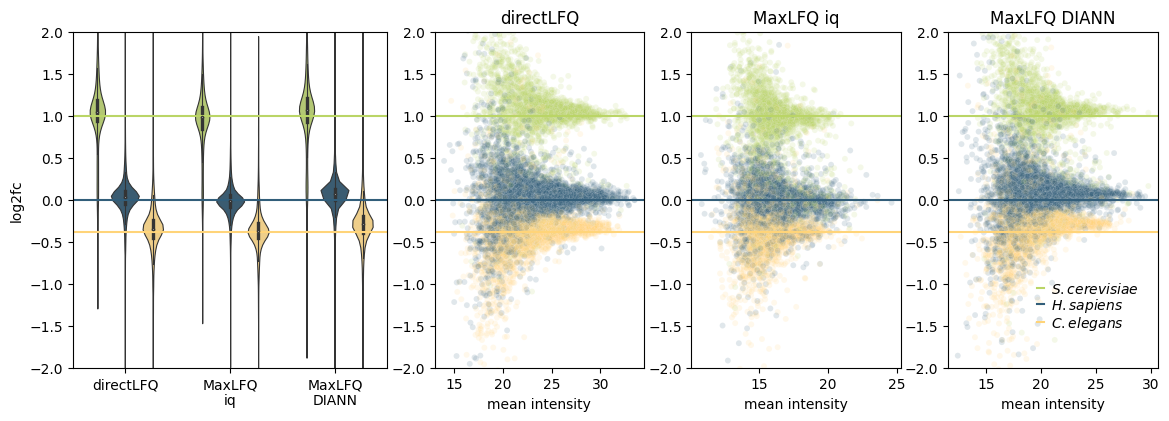

In [10]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import directlfq.benchmarking




methodname2resultsdf = {'directLFQ' : restable_directlfq.formated_dataframe, 'MaxLFQ\niq' : restable_iq.formated_dataframe, 'MaxLFQ\nDIANN' : restable_diann.formated_dataframe}

a4_dims = (11.7, 8.27)
a4_width_no_margin = 10.5
fig, axes = plt.subplots(1, 4,figsize=(14,4.363 ), gridspec_kw={'width_ratios' : [1.5, 1, 1, 1]})

organisms_to_plot = [ "YEAST", "HUMAN", "CAEEL"]
fcs_to_expect = [  np.log2(2), 0, -np.log2(1.3)]

merged_table = directlfq.benchmarking.ResultsTableMerger(method_name2results_df=methodname2resultsdf).merged_table


MultiOrganismMultiMethodBoxPlotAdapted(method_ratio_results_table=merged_table, ax = axes[0], organisms_to_plot=organisms_to_plot,fcs_to_expect= fcs_to_expect)



fcplotter_directLFQ = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[1], resultstable_w_ratios=restable_directlfq, organisms_to_plot = organisms_to_plot, fcs_to_expect= fcs_to_expect, title="directLFQ")

fcplotter_maxLFQiq = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[2], resultstable_w_ratios= restable_iq, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ iq")
fcplotter_maxLFQspect = directlfq.benchmarking.MultiOrganismIntensityFCPlotter(ax=axes[3], resultstable_w_ratios= restable_diann, organisms_to_plot = organisms_to_plot,  fcs_to_expect= fcs_to_expect, title= "MaxLFQ DIANN")



for ax in axes:
    ax.get_legend().remove()

for ax in axes[1:]:
    ax.set_ylabel("")

for ax in axes:
    ax.set_xlabel("mean intensity")
axes[0].set_xlabel("")
axes[0].set_ylim([-2, 2])
# axes[0].set_ylim([15, 33])
axes[1].set_ylim([-2, 2])
# axes[1].set_ylim([17, 35])
axes[2].set_ylim([-2, 2])

axes[3].set_ylim([-2, 2])

lines = axes[1].get_lines()
#axes[1].legend(lines, ["S. cerevisiae", "H. sapiens", "C. elegans"], loc='upper left', bbox_to_anchor=(1, 1))
fig.legend(lines, ["$S. cerevisiae$", "$H. sapiens$", "$C. elegans$"], bbox_to_anchor=[0.85, 0.25], 
           loc='center', ncol=1, title = None, frameon = False, labelspacing = 0, handlelength = 0.5, handletextpad = 0.5)
#change label type in legend

